In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [2]:
X = house_df[['grlivarea', 'garagecars', 'totalbsmtsf', 'firstflrsf', 'totrmsabvgrd',  'yearbuilt', 'yearremodadd']]
Y = house_df.saleprice

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [8]:
X_train.head()

,grlivarea,garagecars,totalbsmtsf,firstflrsf,totrmsabvgrd,yearbuilt,yearremodadd
151,969,2,969,969,5,1975,1975
262,2574,3,1482,1482,10,2007,2007
1037,2263,2,1055,1055,7,2001,2002
1183,1130,2,1120,1130,5,1920,1950
933,1500,2,1500,1500,6,2004,2004


In [ ]:
#add a constant to the model, the "baseline" of the data in case all of 
#the features values are 0

In [9]:
X_train = sm.add_constant(X_train)

In [11]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     432.8
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          3.82e-318
Time:                        19:30:54   Log-Likelihood:                -14076.
No. Observations:                1168   AIC:                         2.817e+04
Df Residuals:                    1160   BIC:                         2.821e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.88e+06   1.37e+05    -13.748   

In [ ]:
#Shows pretty good r-sqared and adjusted r-squared values, however for variables 
#firstflrsf and totrmabvgrd, the pvaluess are too high

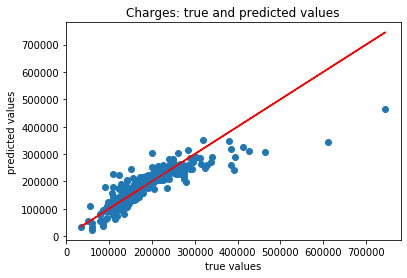

Mean absolute error of the prediction is: 25689.732514611853
Mean squared error of the prediction is: 1689931029.155038
Root mean squared error of the prediction is: 41108.770708390664
Mean absolute percentage error of the prediction is: 14.469425222616586


In [12]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



In [ ]:
#Looks like the model foes a really good job with predicting the house prices excpet for 
#higher values

In [ ]:
#evaluate the performance of the model

In [ ]:
#The values from the metric evaluation seem pretty high, except the MAPE is
#a fairly low. 

In [ ]:
#model 2

In [13]:
X = house_df[['grlivarea', 'garagecars', 'totrmsabvgrd',  'yearbuilt', 'yearremodadd']]
Y = house_df.saleprice

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [15]:
X_train.head()

,grlivarea,garagecars,totrmsabvgrd,yearbuilt,yearremodadd
151,969,2,5,1975,1975
262,2574,3,10,2007,2007
1037,2263,2,7,2001,2002
1183,1130,2,5,1920,1950
933,1500,2,6,2004,2004


In [16]:
X_train = sm.add_constant(X_train)

In [17]:
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     528.6
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          3.04e-296
Time:                        19:47:34   Log-Likelihood:                -14133.
No. Observations:                1168   AIC:                         2.828e+04
Df Residuals:                    1162   BIC:                         2.831e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.075e+06   1.41e+05    -14.691   

In [ ]:
#In this model the adjusted and regular r-squared values are lower than that from the first model

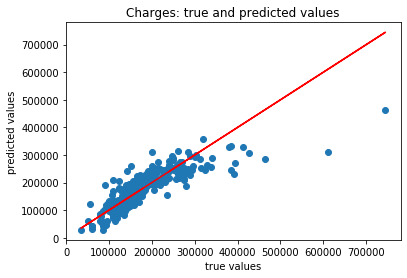

Mean absolute error of the prediction is: 29159.090000885783
Mean squared error of the prediction is: 2016315310.9262307
Root mean squared error of the prediction is: 44903.399770242686
Mean absolute percentage error of the prediction is: 16.517043489345212


In [18]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Overall, the visual shows there is very little difference between this model and the first. However, 
#the evaluation metrics are higher and we're looking for lower values. 

In [ ]:
#model 3

In [19]:
X = house_df[['grlivarea', 'garagecars',  'yearbuilt', 'firstflrsf', 'yearremodadd']]
#added firstflrsf and took out the abovegrade
Y = house_df.saleprice

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))
X_train.head()

The number of observations in training set is 1168
The number of observations in test set is 292


,grlivarea,garagecars,yearbuilt,firstflrsf,yearremodadd
151,969,2,1975,969,1975
262,2574,3,2007,1482,2007
1037,2263,2,2001,1055,2002
1183,1130,2,1920,1130,1950
933,1500,2,2004,1500,2004


In [21]:
X_train = sm.add_constant(X_train)

In [22]:
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     575.5
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          2.52e-311
Time:                        19:51:29   Log-Likelihood:                -14098.
No. Observations:                1168   AIC:                         2.821e+04
Df Residuals:                    1162   BIC:                         2.824e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.034e+06   1.36e+05    -14.916   

In [ ]:
#R-squared values are back to the 70s but still lower than the first model, all P-values are low which is great

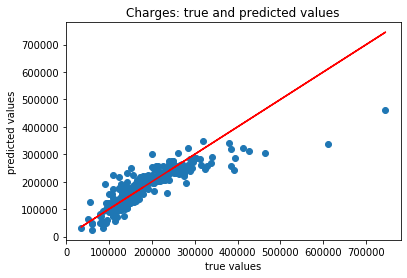

Mean absolute error of the prediction is: 27091.95539556561
Mean squared error of the prediction is: 1797651783.2798567
Root mean squared error of the prediction is: 42398.72384022728
Mean absolute percentage error of the prediction is: 15.653698539777311


In [23]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Still not as good as the first model just by comparing the values of the evaluation metrics 